# TP1 : Génération de variables aléatoires

## G3 SDI - Estimation Avancée

Dans ce TP, on s'intéresse à la génération de variables aléatoires, i.e., la capacité de produire des échantillons finis de variables ou vecteurs aléatoires d'une loi donnée.
* Dans un premier temps, on suppose que l'on dispose d'un générateur de loi uniforme sur $[0,1]$ (avec Numpy, il est donné par `np.random.rand`). À partir de ce générateur, le but sera de générer des échantillons d'autres lois avec des méthodes simples, notamment la méthode de la transformée inverse.
* Dans un deuxième temps, on étudiera des méthodes plus sophistiquées (acceptation-rejet, échantillonnage d'importance).

Pour chaque question, **justifier brièvement la solution puis l'implémenter**. **Comparer avec la densité théorique** à l'aide d'histogrammes ou de KDE.

### Instructions

1. Renommez votre notebook sous la forme `tp1_Nom1_Nom2.ipynb`. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposez votre notebook sur Moodle dans la section prévue à cet effet avant la date limite.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Compte-rendu écrit par AMORRI Farah, MILANO Olivia, 25/11/2025.
</div>

In [1]:
# Importing usual libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

### Exercice 1 - Pour commencer : lois uniformes

**Q1**. À partir de $N$ échantillons d'une loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillons d'une loi uniforme sur l'intervalle $[a,b]$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Si 
U
∼
U
(
0
,
1
)
U∼U(0,1), alors une variable définie par :
X
=
a
+
(
b
−
a
)
U
X=a+(b−a)U
suit une loi uniforme sur 
[
a
,
b
]
[a,b].
</div>

In [6]:
import numpy as np

def uniform_ab(N, a, b, seed):
    np.random.seed(seed)
    U = np.random.rand(N)  # N échantillons de U(0,1)
    X = a + (b - a) * U    # transformation linéaire
    return X




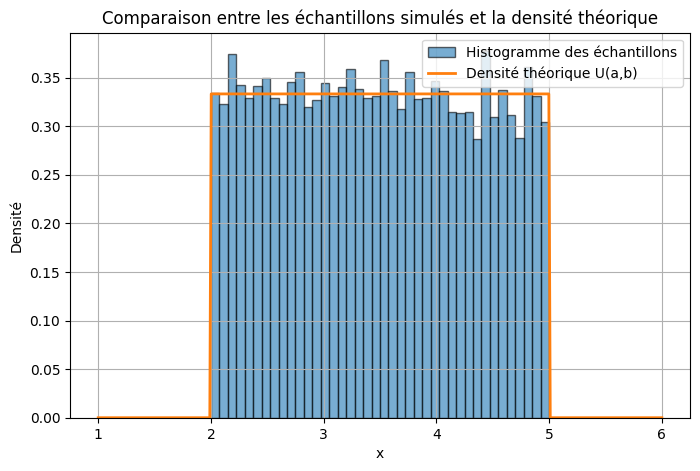

In [7]:
# Verification 

import numpy as np
import matplotlib.pyplot as plt

# ----- Paramètres -----
N = 10000
a, b = 2, 5

# ----- Génération -----
samples = uniform_ab(10000, a=2, b=5)

# ----- Densité théorique -----
x_vals = np.linspace(a - 1, b + 1, 400)
density = np.where((x_vals >= a) & (x_vals <= b), 1/(b - a), 0)

# ----- Tracé -----
plt.figure(figsize=(8, 5))

# Histogramme normalisé
plt.hist(samples, bins=40, density=True, alpha=0.6, edgecolor='black', label='Histogramme des échantillons')

# Densité théorique
plt.plot(x_vals, density, linewidth=2, label='Densité théorique U(a,b)')

plt.title('Comparaison entre les échantillons simulés et la densité théorique')
plt.xlabel('x')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()


**Q2**. Comment obtenir $N$ échantillons d'une loi uniforme sur le pavé $[a,b] \times [c,d]$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [16]:
def uniform_rectangle(N, a, b, c, d):
    X = uniform_ab(N, a, b, seed=42)   # coordonnée X
    Y = uniform_ab(N, c, d, seed=43)   # coordonnée Y
    return X, Y

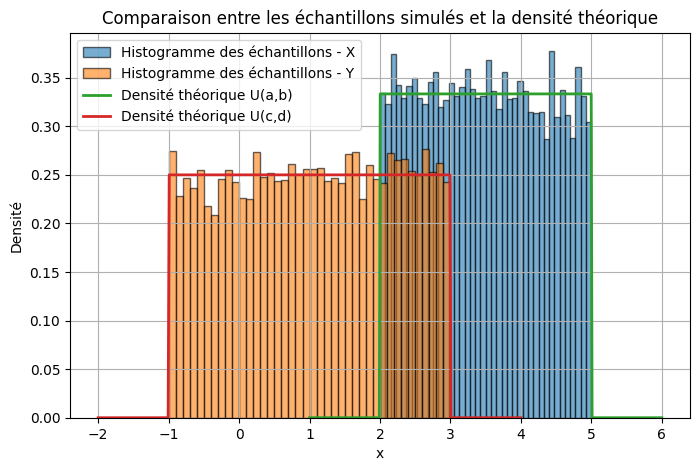

In [17]:
#Paramètres 
a = 2 
b = 5 
c = -1
d = 3

N = 10000

# Génération
X, Y = uniform_rectangle(N, a=2, b=5, c=-1, d=3)

# Densité théorique 
x_vals = np.linspace(a - 1, b + 1, 400)
y_vals = np.linspace(c - 1, d + 1, 400)
density_X = np.where((x_vals >= a) & (x_vals <= b), 1/(b - a), 0)
density_Y = np.where((y_vals >= c) & (y_vals <= d), 1/(d - c), 0)


# ----- Tracé -----
plt.figure(figsize=(8, 5))

# Histogramme normalisé
plt.hist(X, bins=40, density=True, alpha=0.6, edgecolor='black', label='Histogramme des échantillons - X')
plt.hist(Y, bins=40, density=True, alpha=0.6, edgecolor='black', label='Histogramme des échantillons - Y')
# Densité théorique
plt.plot(x_vals, density_X, linewidth=2, label='Densité théorique U(a,b)')
plt.plot(y_vals, density_Y, linewidth=2, label='Densité théorique U(c,d)')



plt.title('Comparaison entre les échantillons simulés et la densité théorique')
plt.xlabel('x')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()



/var/folders/7x/5z5j8nzn73j56x9hr4346d_80000gn/T/ipykernel_59902/501123235.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


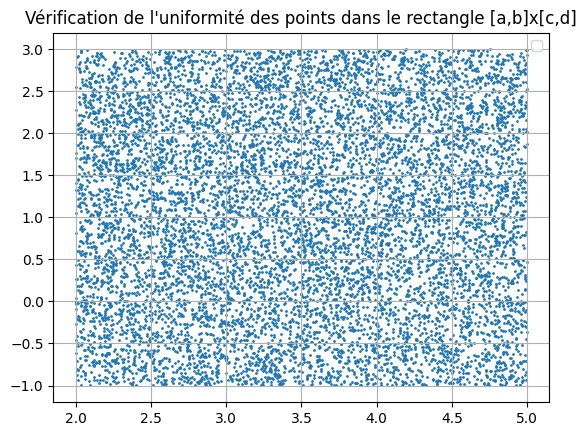

In [20]:
plt.scatter(X, Y, s=1)
plt.legend()
plt.title("Vérification de l'uniformité des points dans le rectangle [a,b]x[c,d]")
plt.grid(True)
plt.show()

**Q3**. À partir de $N$ échantillons de loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillons de loi uniforme discrète sur $\{1, ..., K\}$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [22]:
def discrete_uniform_randint(N, K, seed):
    np.random.seed(seed)
    return np.random.randint(1, K+1, size=N)

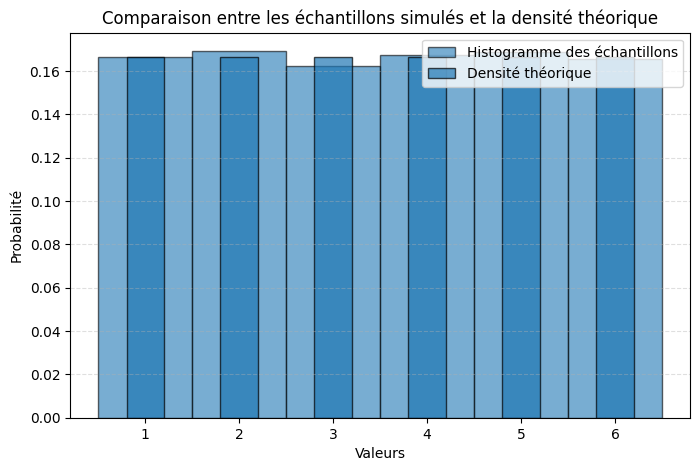

In [24]:
#Paramètres 
N = 10000
K = 6

#Generation 
samples = discrete_uniform_randint(N,K, seed=42)

#Density
theoretical = np.ones(K) / K
indices = np.arange(1, K+1)

# ----- Tracé -----
plt.figure(figsize=(8, 5))

# Histogramme discret
plt.hist(samples, bins=np.arange(1, K+2)-0.5, density=True,
         alpha=0.6, edgecolor='black', label='Histogramme des échantillons')

# Densité théorique (barplot)
plt.bar(indices, theoretical, width=0.4, alpha=0.7, 
        label='Densité théorique', edgecolor='black')

plt.title('Comparaison entre les échantillons simulés et la densité théorique')
plt.xlabel('Valeurs')
plt.ylabel('Probabilité')
plt.xticks(indices)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


### Exercice 2 - Méthode de la transformée inverse

Soit $X$ une variable aléatoire réelle de fonction de répartition $F$ (rappel : $F$ est une fonction croissante de $\mathbb{R}$ dans $[0,1]$, et "càdlàg", mais pas nécessairement bijective). On définit la **fonction inverse généralisée** $F^{-1}$ de $F$ par :
$$\forall~u \in [0,1],~F^{-1}(u) = \inf\{x \in \mathbb{R}, F(x) \geq u\}.$$

Cette fonction conïncide avec l'inverse classique quand $F$ est bijective (attention même si $F$ est continue elle n'est pas nécessairement bijective, il peut y avoir des plateaux). On a la proposition suivante :


Si $U$ suit la loi uniforme sur l'intervalle $[0,1]$, alors la v.a. $F^{-1}(U)$ a pour fonction de répartition $F$ (et donc la même loi que $X$).


Cela donne donc la méthode de la **transformée inverse** ; Si l'on connait explicitement la fonction $F^{-1}$, on peut simuler de n'importe quelle variable aléatoire réelle à partir d'un échantillon de loi uniforme.

**Q1**. À l'aide de cette méthode, simuler $N$ échantillons d'une loi exponentielle de paramètre $\lambda$.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

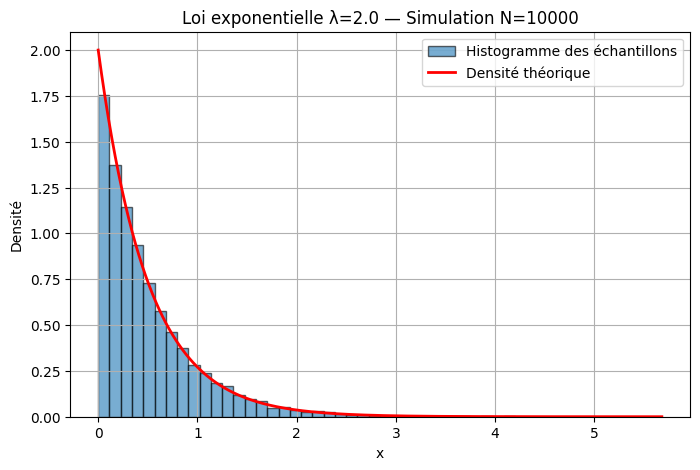

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Paramètres -----
N = 10000
lambda_ = 2.0

np.random.seed(42)  # pour reproductibilité

# ----- Simulation via transformée inverse -----
U = np.random.rand(N)
X = -np.log(U) / lambda_  # échantillons exponentiels

# ----- Densité théorique -----
x_vals = np.linspace(0, X.max(), 500)
density = lambda_ * np.exp(-lambda_ * x_vals)

# ----- Tracé -----
plt.figure(figsize=(8,5))
plt.hist(X, bins=50, density=True, alpha=0.6, edgecolor='black', label='Histogramme des échantillons')
plt.plot(x_vals, density, 'r', linewidth=2, label='Densité théorique')
plt.title(f'Loi exponentielle λ={lambda_} — Simulation N={N}')
plt.xlabel('x')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()


**Q2**. Quelles sont d'après vous les limitations de la méthode de la transformée inverse ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

### Exercice 3 - Méthode de Box-Müller

On a la proposition suivante :


Soit $R \sim \text{Exp}(1/2)$ et $\Theta \sim U([0, 2 \pi])$ deux variables aléatoires indépendantes.
    
Alors $X = \sqrt{R} \cos(\Theta)$ et $Y = \sqrt{R} \sin(\Theta)$ sont deux variables indépendantes de loi $\mathcal{N}(0,1)$.


Cette méthode est connue comme la méthode de **Box-Müller** (1958), et est l'une des méthodes de référence pour générer des variables aléatoires normales.

**Q1 (Bonus)**. Montrer la proposition.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

**Q2**. En déduire une façon de générer un $N$ échantillons de loi normale $\mathcal{N}(0,1)$ à partir d'échantillons d'une loi uniforme sur l'intervalle $[0,1]$.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

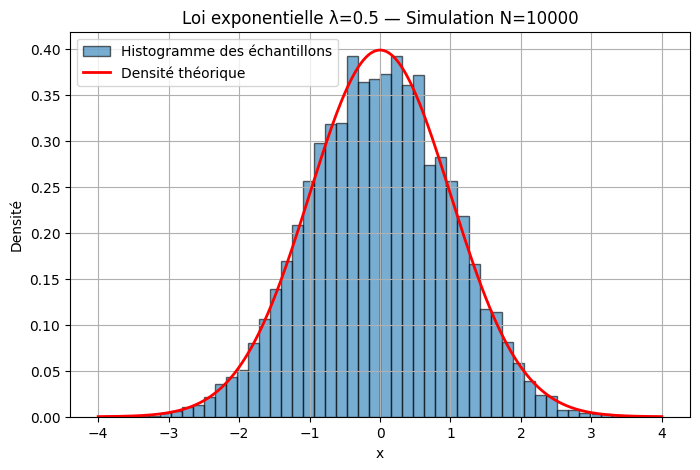

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
N = 10000
lambda_ = 1/2

 # pour reproductibilité

# Simulation via transformée inverse 
np.random.seed(42) 
U = np.random.rand(N)
theta = uniform_ab(N,0, 2*np.pi, seed=43)
R = -np.log(U) / lambda_  # échantillons exponentiels
X = np.sqrt(R) * np.cos(theta)




# Densité théorique 
x_vals = np.linspace(-4, 4, 500)
density = norm.pdf(x_vals, loc=0, scale=1)

# ----- Tracé -----
plt.figure(figsize=(8,5))
plt.hist(X, bins=50, density=True, alpha=0.6, edgecolor='black', label='Histogramme des échantillons')
plt.plot(x_vals, density, 'r', linewidth=2, label='Densité théorique')
plt.title(f'Loi exponentielle λ={lambda_} — Simulation N={N}')
plt.xlabel('x')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()


**Q3**. À partir de $N$ échantillons de loi $\mathcal{N}(0,1)$, comment obtenir un $N$ échantillons de loi $\mathcal{N}(\mu, \sigma^2)$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [ ]:
########
### YOUR CODE HERE
########

**Q4**. On s'intéresse maintenant à la simulation d'un **vecteur** gaussien en dimension $d$.

Expliquer pourquoi la méthode de Box-Müller permet de simuler des vecteurs de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$.

Soit $X \sim \mathcal{N_d}(\mathbf{0}_d, I_d)$, $\mathbf{m} \in \mathbb{R}^d$, et $\boldsymbol{\Sigma} \in \mathbb{R}^{d \times d}$ symétrique définie positive. On suppose qu'il existe $\mathbf{L} \in \mathbb{R}^{d \times d}$ tel que $\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top}$.

À l'aide des propriétés des vecteurs gaussiens, montrer que $Y = \mathbf{m} + \mathbf{L}X \sim \mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

**Q5**. On peut montrer qu'une telle matrice $\mathbf{L}$ existe toujours. C'est la **décomposition de Cholesky** ($\mathbf{L}$ est triangulaire inférieure), qui est fondamentale en statistique et *machine learning*. Elle tire son nom d'André-Louis Cholesky, ingénieur polytechnicien, mort pendant la première guerre mondiale (résultat publié de manière posthume en 1924). À noter que la complexité associée à cette décomposition est $\mathcal{O}(d^3)$ !

À partir de $N$ échantillons de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$, générer $N$ échantillons de loi $\mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$. Prendre $d=2$ et utiliser `np.linalg.cholesky`.

In [ ]:
########
### YOUR CODE HERE
########

### Exercice 4 - Acceptation-Rejet (*Rejection sampling*)

**Q1**. On considère la loi Bêta, dont la densité sur $[0,1]$ est
$$f(x;\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1} \quad \alpha > 0, \quad \beta > 0.$$

On souhaite obtenir des échantillons de la loi Bêta dans le cas suivant : $\alpha = 2, \beta = 2$.
* Expliquer pourquoi il est difficile de mettre en place la méthode de la transformée inverse.
* Quelle loi très simple peut-on utiliser comme loi instrumentale ?
* Implémenter alors un algorithme acceptation-rejet pour obtenir $N = 10000$ échantillons.
* Comparer la proportion empirique d'échantillons acceptés avec sa valeur théorique.
* Quelle difficulté rencontre-t-on pour le cas $\alpha = \beta = 0.5$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Difficulté de la méthode de la Transformée Inverse pour la loi Bêta(2,2)

Pour appliquer la méthode de la transformée inverse, nous devons d'abord déterminer la fonction de répartition $F(x)$, puis calculer son inverse $F^{-1}(u)$.

- **Calcul de la densité $f(x)$**

Pour $\alpha=2$ et $\beta=2$, la constante de normalisation est $\frac{\Gamma(4)}{\Gamma(2)\Gamma(2)} = \frac{6}{1} = 6$.
La densité s'écrit donc :
$$f(x) = 6 x^{2-1} (1-x)^{2-1} = 6x(1-x) = 6x - 6x^2 \quad \text{pour } x \in [0,1]$$

- **Calcul de la fonction de répartition $F(x)$**

La fonction de répartition est l'intégrale de la densité :
$$F(x) = \int_0^x (6t - 6t^2) dt = \left[ 3t^2 - 2t^3 \right]_0^x = 3x^2 - 2x^3$$

- **Le problème de l'inversion**

La méthode de la transformée inverse consiste à simuler $U \sim \mathcal{U}[0,1]$ et à résoudre l'équation $F(X) = U$ pour trouver $X$.
Cela revient à chercher les racines de l'équation polynomiale de degré 3 suivante :
$$3x^2 - 2x^3 = u \iff 2x^3 - 3x^2 + u = 0$$

- **Conclusion :**

Dans ce cas il est plus compliqué d'utiliser la transformée inverse car la fonction de répartition n'est pas facilement inversible. Trouver $x$ en fonction de $u$ nécessite de résoudre une équation cubique (polynôme de degré 3). Pour des paramètres $\alpha$ et $\beta$ quelconques, il n'existe généralement pas de solution analytique du tout. C'est pourquoi on privilégie ici la méthode du Rejection Sampling.


### Choix de la loi instrumentale

La loi la plus simple à utiliser est la **loi Uniforme sur $[0,1]$**, notée $\mathcal{U}[0,1]$.

- **Justification :**
1.  Support identique : La loi cible (Bêta) et la loi instrumentale (Uniforme) sont toutes deux définies sur le même intervalle $[0, 1]$.
2.  Simplicité de génération
3.  Densité constante : La densité de la loi uniforme est $g(x) = 1$ pour $x \in [0,1]$. Cela simplifie grandement le calcul du ratio d'acceptation, car l'inégalité $f(x) \le M \cdot g(x)$ devient simplement $f(x) \le M$.

</div>

Échantillons générés : 10000
------------------------------
Taux d'acceptation théorique (1/M) : 0.6667
Taux d'acceptation empirique       : 0.6682
------------------------------


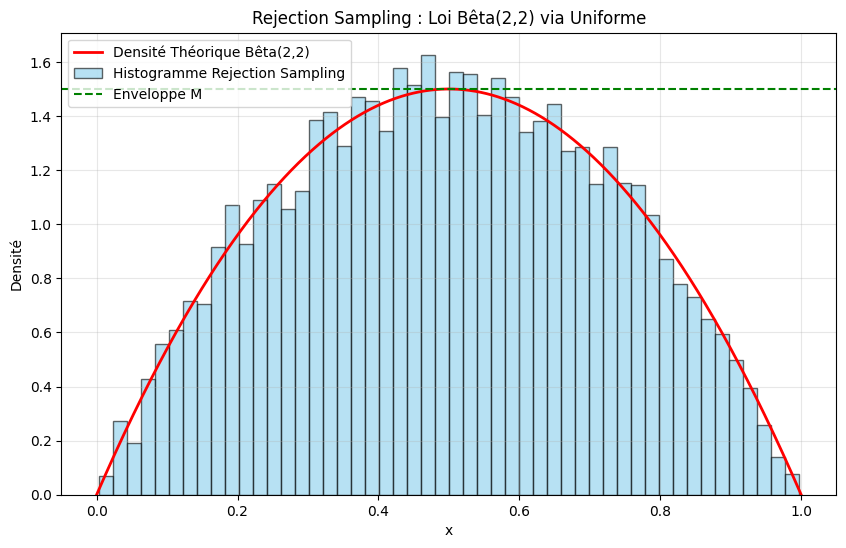

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Paramètres
alpha = 2
beta = 2
N = 10000  
M = 1.5     # Valeur max de la densité Beta(2,2) -> f(0.5) = 6*0.5*0.5 = 1.5


def beta_pdf(x, alpha, beta):
    coef = math.gamma(alpha + beta) / (math.gamma(alpha) * math.gamma(beta))
    return coef * (x**(alpha - 1)) * ((1 - x)**(beta - 1))


accepted_samples = []
total_trials = 0 # Compteur pour le calcul du taux d'acceptation

while len(accepted_samples) < N:
    total_trials += 1
    
    y = np.random.uniform(0, 1)
    u = np.random.uniform(0, M)
    
    limit = beta_pdf(y, alpha, beta)
    
    #Test d'acceptation
    if u <= limit:
        accepted_samples.append(y)

print(f"Échantillons générés : {len(accepted_samples)}")


taux_empirique = N / total_trials
taux_theorique = 1 / M

print("-" * 30)
print(f"Taux d'acceptation théorique (1/M) : {taux_theorique:.4f}")
print(f"Taux d'acceptation empirique       : {taux_empirique:.4f}")
print("-" * 30)


plt.figure(figsize=(10, 6))

x_vals = np.linspace(0, 1, 1000)
y_vals = [beta_pdf(x, alpha, beta) for x in x_vals] 
plt.plot(x_vals, y_vals, 'r-', linewidth=2, label="Densité Théorique Bêta(2,2)")


plt.hist(accepted_samples, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Histogramme Rejection Sampling")

# Enveloppe M * g(x) (Ici c'est juste une ligne horizontale à y=1.5)
plt.axhline(y=M, color='green', linestyle='--', label='Enveloppe M')

plt.title("Rejection Sampling : Loi Bêta(2,2) via Uniforme")
plt.xlabel("x")
plt.ylabel("Densité")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Analyse des résultats du Rejection Sampling (Loi Bêta)

**1. Choix de la constante d'enveloppe $M$**

Pour que l'algorithme de rejet fonctionne, nous devons trouver une constante $M$ telle que la courbe $M \cdot g(x)$ soit toujours au-dessus de la densité cible $f(x)$.
Comme nous avons choisi une loi instrumentale uniforme ($g(x) = 1$), cela revient à trouver le maximum de la fonction $f$ sur $[0,1]$.

* **Fonction cible :** $f(x) = 6x(1-x) = 6x - 6x^2$.
* **Dérivée :** $f'(x) = 6 - 12x$.
* **Optimisation :** La dérivée s'annule pour $6 - 12x = 0 \iff x = 0.5$.
* **Calcul du maximum :** $f(0.5) = 6 \cdot 0.5 \cdot (1 - 0.5) = 1.5$.

Nous fixons donc la constante **$M = 1.5$**.

**2. Comparaison des proportions (Taux d'acceptation)**

Nous cherchons à vérifier l'efficacité de l'algorithme en comparant le taux d'acceptation théorique et empirique.

* **Taux Théorique :**
    Dans la méthode du rejet, la probabilité d'accepter un échantillon correspond géométriquement au rapport entre l'aire sous la courbe cible ($f$) et l'aire sous l'enveloppe ($M \cdot g$). Comme $f$ et $g$ sont des densités (aire = 1), le taux est simplement l'inverse de $M$ :
    $$P(\text{Accept}) = \frac{1}{M} = \frac{1}{1.5} = \frac{2}{3} \approx \mathbf{0.6667}$$

* **Taux Empirique :**
    Ce taux est calculé expérimentalement par le rapport :
    $$\text{Taux empirique} = \frac{\text{Nombre d'échantillons gardés } (N)}{\text{Nombre total de tentatives}}$$

**Conclusion :**
Les résultats obtenus montrent que le taux empirique est extrêmement proche de $0.66$. Cela valide deux points :
1.  La distribution suit bien la loi cible.
2.  L'efficacité est conforme à la théorie : environ un tiers des points générés sont rejetés (perdus).

</div>

Échantillons générés : 10000
------------------------------
Taux d'acceptation théorique (1/M) : 0.6667
Taux d'acceptation empirique       : 0.5754
------------------------------


/var/folders/7x/5z5j8nzn73j56x9hr4346d_80000gn/T/ipykernel_11411/954511223.py:14: RuntimeWarning: divide by zero encountered in scalar power
  return coef * (x**(alpha - 1)) * ((1 - x)**(beta - 1))


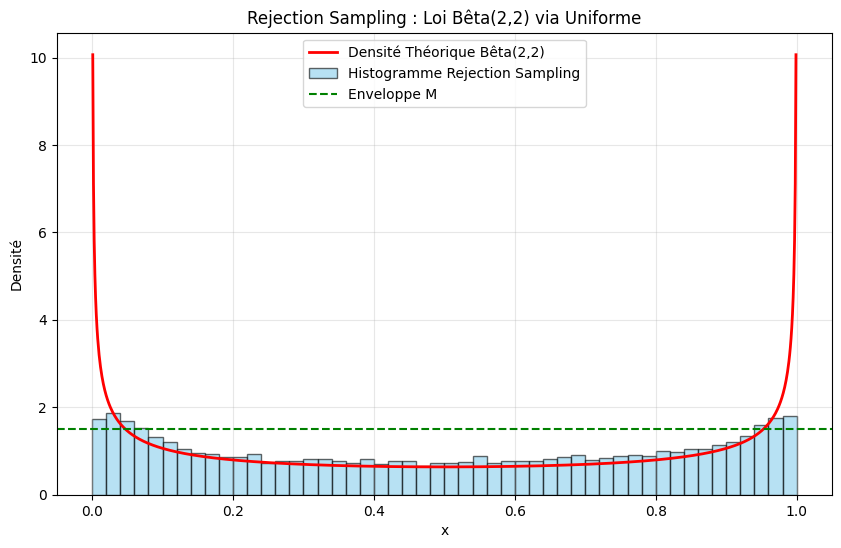

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Paramètres
alpha = 0.5
beta = 0.5
N = 10000  
M = 1.5     # Valeur max de la densité Beta(2,2) -> f(0.5) = 6*0.5*0.5 = 1.5


def beta_pdf(x, alpha, beta):
    coef = math.gamma(alpha + beta) / (math.gamma(alpha) * math.gamma(beta))
    return coef * (x**(alpha - 1)) * ((1 - x)**(beta - 1))


accepted_samples = []
total_trials = 0 # Compteur pour le calcul du taux d'acceptation

while len(accepted_samples) < N:
    total_trials += 1
    
    y = np.random.uniform(0, 1)
    u = np.random.uniform(0, M)
    
    limit = beta_pdf(y, alpha, beta)
    
    #Test d'acceptation
    if u <= limit:
        accepted_samples.append(y)

print(f"Échantillons générés : {len(accepted_samples)}")


taux_empirique = N / total_trials
taux_theorique = 1 / M

print("-" * 30)
print(f"Taux d'acceptation théorique (1/M) : {taux_theorique:.4f}")
print(f"Taux d'acceptation empirique       : {taux_empirique:.4f}")
print("-" * 30)


plt.figure(figsize=(10, 6))

x_vals = np.linspace(0, 1, 1000)
y_vals = [beta_pdf(x, alpha, beta) for x in x_vals] 
plt.plot(x_vals, y_vals, 'r-', linewidth=2, label="Densité Théorique Bêta(2,2)")


plt.hist(accepted_samples, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Histogramme Rejection Sampling")

# Enveloppe M * g(x) (Ici c'est juste une ligne horizontale à y=1.5)
plt.axhline(y=M, color='green', linestyle='--', label='Enveloppe M')

plt.title("Rejection Sampling : Loi Bêta(2,2) via Uniforme")
plt.xlabel("x")
plt.ylabel("Densité")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Difficulté pour le cas $\alpha = \beta = 0.5$

**Problème : La densité n'est pas bornée.**

Contrairement au cas $\alpha=\beta=2$ (forme en cloche), la densité pour $\alpha=\beta=0.5$ adopte une forme en "U" (convexe).
L'expression de la densité contient des termes en puissance négative :
$$f(x) \propto x^{-0.5}(1-x)^{-0.5} = \frac{1}{\sqrt{x(1-x)}}$$

**Analyse des limites :**
Aux bornes de l'intervalle $[0,1]$, la fonction diverge :
$$\lim_{x \to 0} f(x) = +\infty \quad \text{et} \quad \lim_{x \to 1} f(x) = +\infty$$

**Conclusion pour l'algorithme :**
L'algorithme de rejet avec une loi instrumentale **Uniforme** nécessite de majorer la densité cible par une constante $M$ (car $f(x) \le M \cdot 1$).
Puisque la fonction tend vers l'infini, il n'existe pas de constante $M$ finie capable de couvrir toute la densité. On ne peut donc pas appliquer le Rejection Sampling avec une loi uniforme pour ces paramètres.

</div>

**Q2**. On souhaite maintenant obtenir des échantillons d'une loi gaussienne tronquée, i.e., une loi normale restreinte à un certain intervalle (en 1D), ou un certain pavé de l'espace (pour le cas multivarié).

On considère le cas d'une gaussienne multivariée $\mathcal{N}_d(0, I_d)$ que l'on tronque sur le pavé $[-1,2]^d$. On prendra comme loi instrumentale la loi $\mathcal{N}(0, I_d)$ (i.e., non tronquée)

* Justifier ce choix de loi instrumentale.
* Pour le cas univarié ($d=1$), calculer numériquement la probabilité d'acceptation de l'algorithme acceptation-rejet. On pourra utiliser `scipy.stats.cdf`.
* Que devient cette probabilité pour $d=10$ ? $d=100$ ? Conclure quant à la faiblesse fondamentale de l'algorithme acceptation-rejet.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Justification de la loi instrumentale $\mathcal{N}(0, I_d)$

Le choix de la loi Gaussienne standard non tronquée comme loi instrumentale se justifie par trois points principaux :

Sur le pavé de troncation $K = [-1, 2]^d$, la densité cible $f(x)$ est exactement proportionnelle à la densité instrumentale $g(x)$. La loi cible n'est qu'une restriction de la loi instrumentale.


Grâce à cette proportionnalité, l'étape d'acceptation-rejet se simplifie. Il n'est pas nécessaire de calculer le ratio des densités ni de tirer une variable uniforme supplémentaire $U$. L'algorithme devient un simple filtre géométrique :
* On génère $X$ selon $\mathcal{N}(0, I_d)$.
* On accepte $X$ si et seulement si toutes ses coordonnées appartiennent à $[-1, 2]$.


La loi $\mathcal{N}(0, I_d)$ est très simple et rapide à simuler informatiquement (méthode de Box-Müller ou bibliothèques standards), contrairement à la loi tronquée qui n'a pas de générateur direct simple.
</div>

In [13]:
from scipy.stats import norm


lower_bound = -1
upper_bound = 2

# P(a < X < b) = CDF(b) - CDF(a)
prob_acceptance = norm.cdf(upper_bound) - norm.cdf(lower_bound)

print(f"Probabilité d'acceptation calculée : {prob_acceptance:.4f}")
print(f"Cela signifie qu'on garde environ {prob_acceptance*100:.2f}% des points générés.")
print("\n")
print("\n")




# Test pour différentes dimensions
dims = [1, 2, 5, 10, 20, 50, 100]

print(f"{'Dimension':<10} | {'Probabilité d acceptation':<25} | {'1 chance sur... de conserver le point'}")
print("-" * 85)

for d in dims:
    proba = (norm.cdf(2) - norm.cdf(-1))**d  #puissance d (car les dimensions sont indépendantes)
    inverse = 1/proba if proba > 0 else float('inf')
    print(f"{d:<10} | {proba:<25.2e} | {inverse:.0f}")

Probabilité d'acceptation calculée : 0.8186
Cela signifie qu'on garde environ 81.86% des points générés.




Dimension  | Probabilité d acceptation | 1 chance sur... de conserver le point
-------------------------------------------------------------------------------------
1          | 8.19e-01                  | 1
2          | 6.70e-01                  | 1
5          | 3.68e-01                  | 3
10         | 1.35e-01                  | 7
20         | 1.83e-02                  | 55
50         | 4.50e-05                  | 22210
100        | 2.03e-09                  | 493300674


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Analyse de la performance : L'impact de la dimension

Ce résultat illustre que lorsque la dimension augmente, l'algorithme ne devient pas juste "un peu moins précis", il devient inutilisable en pratique car le temps d'attente pour avoir un succès devient infini. C'est ce qu'on appelle l'explosion de la complexité algorithmique due au fléau de la dimension.

* **Faible dimension ($d=1$ à $5$) :** L'algorithme est très performant. Pour $d=1$, on conserve environ **82%** des points générés. Le "coût" de la méthode est négligeable (on jette très peu de points).
* **Moyenne dimension ($d=10$ à $20$) :** L'efficacité chute rapidement. À $d=10$, le taux d'acceptation tombe à **13.5%**. Il faut générer environ 7 points pour en garder un seul. Le coût a été multiplié par 6 par rapport à la dimension 1.
* **Haute dimension ($d=50$ à $100$) :**
    * Pour $d=50$, il faut générer plus de **22 000** points pour en obtenir un seul valide.
    * Pour $d=100$, la probabilité devient infinitésimale ($2.03 \times 10^{-9}$).


La colonne "1 chance sur..." représente le nombre moyen d'itérations nécessaires pour obtenir **un seul** échantillon accepté.
* Le cas $d=100$ montre qu'il faut générer en moyenne **493 millions de vecteurs** (environ 0.5 milliard) pour espérer en conserver *un seul*.
* Si l'on souhaitait constituer un échantillon de taille $N=10\,000$ en dimension 100, il faudrait générer environ $5 \times 10^{12}$ (5 000 milliards) de candidats. 
</div>

### Exercice 5 - Estimation de $\pi$ par Monte Carlo

On rappelle que $\pi$ est égal à la surface d'un cercle de rayon 1, i.e.
$$ \pi = \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) dx dy.$$

Ce qui peut se réécrire comme
$$ \pi = 4 \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) p(x) p(y) dx dy.$$
Où $p(x)$ et $p(y)$ sont les densités de la loi uniforme sur $[-1,1]$.

* En déduire l'esimtateur de Monte Carlo de $\pi$.
* Générer $N_s = 10000$ échantillons, puis représenter l'évolution de la valeur de l'estimation par Monte Carlo de $\pi$ en ne gardant que les $N$ premiers. Quel résultat fondamental est-on en train d'illustrer ?
* Faire 1000 simulations de l'estimation par Monte Carlo de $\pi$ avec $N_s = 10000$ échantillons, et vérifier le résultat de convergence en loi de l'estimateur de Monte Carlo donné par le TCL.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Pour construire l'estimateur de Monte Carlo, il faut utiliser le théorème de la Loi des Grands Nombres.

La deuxième formulation de l'aire du cercle correspond à une espérance mathématique. En effet, si nous considérons deux variables aléatoires indépendantes $X$ et $Y$ suivant une loi uniforme sur $[-1, 1]$, leur densité jointe est exactement $p(x)p(y)$.

On peut donc réécrire $\pi$ comme suit :

$$
\pi = 4 \cdot \mathbb{E}\left[ \mathbb{1}_{X^2 + Y^2 \leq 1}(X,Y) \right]
$$

D'après la Loi des Grands Nombres, pour un grand nombre $N$ de tirages indépendants, la moyenne empirique converge vers l'espérance.

L'estimateur de Monte Carlo $\hat{\pi}_N$ est donc défini par :

$$
\hat{\pi}_N = \frac{4}{N} \sum_{i=1}^{N} \mathbb{1}_{X_i^2 + Y_i^2 \leq 1}
$$

Où :
* $N$ est la taille de l'échantillon.
* $(X_i, Y_i)$ sont $N$ couples de variables aléatoires i.i.d. tirées selon la loi uniforme $\mathcal{U}([-1, 1])$.
* La fonction indicatrice $\mathbb{1}_{\text{condition}}$ vaut $1$ si la condition est vraie (le point tombe dans le cercle), et $0$ sinon.
</div>

Pi_hat final : 3.1656


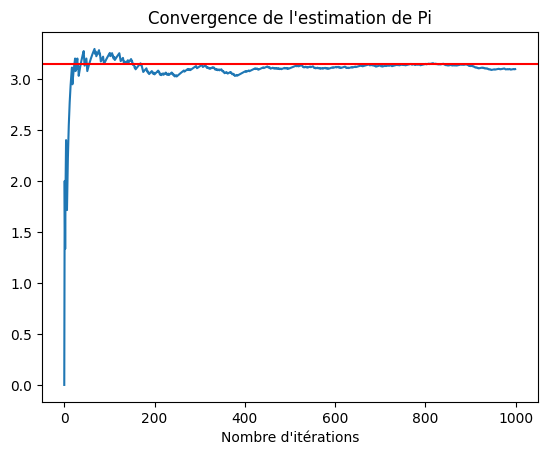

In [ ]:
#Paramètre 
Ns = 10000
N = 1000

#Lois uniformes
X = 2 * np.random.rand(Ns) - 1
Y = 2 * np.random.rand(Ns) - 1 

#Monte Carlo
somme = 0 
j = 0 
pi_hat_inter = []

for i in range(Ns):
    if X[i]**2+Y[i]**2<=1:
        somme+=1

    if j<N:
        estimation_courante = 4 * (somme / (i + 1))
        pi_hat_inter.append(estimation_courante)
        j+=1


pi_hat = (4/Ns) * somme

print(f"Pi_hat final : {pi_hat}")

plt.plot(pi_hat_inter)
plt.axhline(y=np.pi, color='r', linestyle='-') # Ligne rouge sur la vraie valeur de PI
plt.title("Convergence de l'estimation de Pi")
plt.xlabel("Nombre d'itérations")
plt.show()




<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Analyse du résultat

Ce graphique illustre un résultat fondamental en probabilités : la Loi Forte des Grands Nombres.

L'estimateur de Monte Carlo $\hat{\pi}_N$ est calculé comme la moyenne empirique d'une suite de variables aléatoires indépendantes et identiquement distribuées (i.i.d) (ici, des variables indicatrices valant 1 si le point est dans le cercle, et 0 sinon).

D'après la Loi des Grands Nombres, la moyenne empirique converge presque sûrement vers l'espérance mathématique lorsque la taille de l'échantillon $N$ tend vers l'infini :

$$\lim_{N \to \infty} \hat{\pi}_N = \mathbb{E}[\hat{\pi}_N] = \pi$$


* **Phase transitoire ($N$ petit) :** On observe de fortes oscillations autour de la valeur cible (ligne rouge). La variance de l'estimateur est encore grande, ce qui traduit l'incertitude statistique due à la faible taille de l'échantillon.
* **Phase de convergence ($N$ grand) :** Les fluctuations s'amortissent progressivement au fur et à mesure que $N$ augmente. La courbe bleue se stabilise et tend à se confondre avec la ligne rouge, illustrant visuellement la convergence de l'estimateur vers la vraie valeur de $\pi$. La vitesse à laquelle ces oscillations diminuent est régie par un autre théorème : le Théorème Central Limite, qui nous dit que l'erreur décroît à une vitesse de  $\frac{1}{\sqrt N}$
</div>


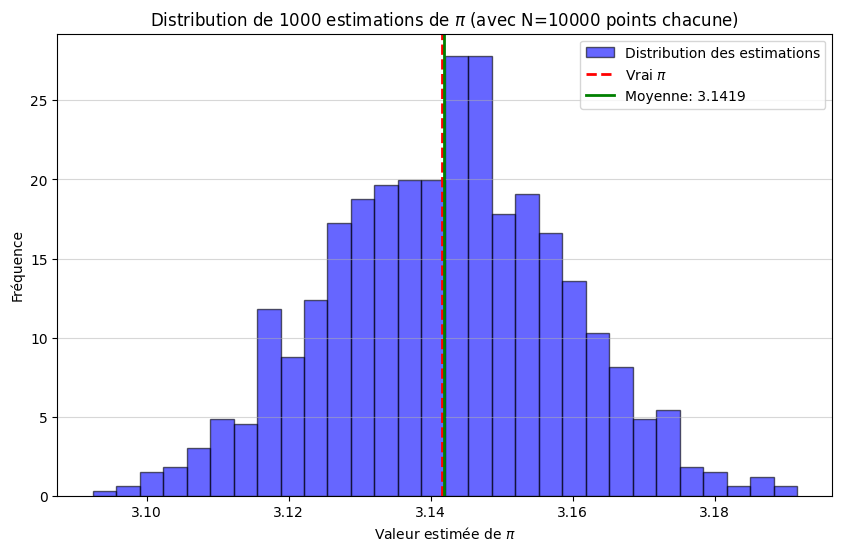

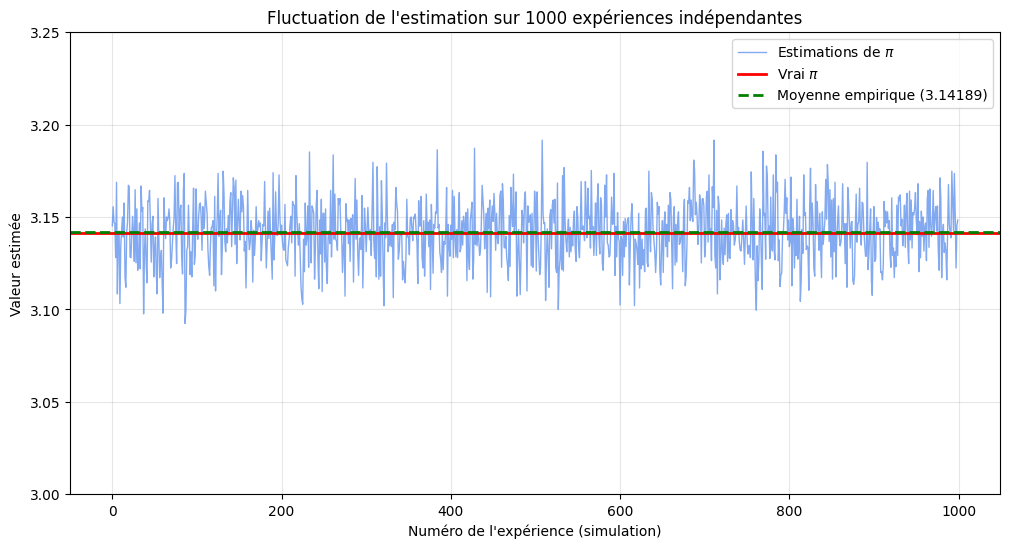

In [ ]:
#Paramètre 
Ns = 10000
Nb_sim = 1000


#Monte Carlo
pi_hat_estimates = []
for j in range(Nb_sim):
    #Lois uniformes
    X = 2 * np.random.rand(Ns) - 1
    Y = 2 * np.random.rand(Ns) - 1 
    somme = 0 
    for i in range(Ns):
        if X[i]**2+Y[i]**2<=1:
            somme+=1

    pi_hat = (4/Ns) * somme
    pi_hat_estimates.append(pi_hat)


# PLOT 1 : Histogramme 
plt.figure(figsize=(10, 6))
plt.hist(pi_hat_estimates, bins=30, density=True, alpha=0.6, color='b', edgecolor='black', label='Distribution des estimations')
plt.axvline(x=np.pi, color='r', linestyle='--', linewidth=2, label='Vrai $\pi$') # Valeur de Pi théorique 
moyenne_empirique = np.mean(pi_hat_estimates) # Notre moyenne empirique doit etre proche de la valeur théorique
plt.axvline(x=moyenne_empirique, color='g', linestyle='-', linewidth=2, label=f'Moyenne: {moyenne_empirique:.4f}')

plt.title(f"Distribution de {Nb_sim} estimations de $\pi$ (avec N={Ns} points chacune)")
plt.xlabel("Valeur estimée de $\pi$")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(axis='y', alpha=0.5)

# PLOT 2 :  Line Plot 
plt.figure(figsize=(12, 6))
plt.plot(pi_hat_estimates, color='cornflowerblue', linewidth=1, alpha=0.8, label='Estimations de $\pi$')
plt.axhline(y=np.pi, color='red', linestyle='-', linewidth=2, label='Vrai $\pi$')# Valeur de Pi théorique 
moyenne_empirique = np.mean(pi_hat_estimates)# Notre moyenne empirique doit etre proche de la valeur théorique
plt.axhline(y=moyenne_empirique, color='green', linestyle='--', linewidth=2, label=f'Moyenne empirique ({moyenne_empirique:.5f})')


plt.title(f"Fluctuation de l'estimation sur {len(pi_hat_estimates)} expériences indépendantes")
plt.xlabel("Numéro de l'expérience (simulation)")
plt.ylabel("Valeur estimée")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.ylim(3.0, 3.25) 



plt.show()




<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Vérification de la convergence en loi (TCL)


L'histogramme représentant la distribution des $1000$ estimations de $\pi$ adopte une forme de "cloche" symétrique caractéristique.


D'après le **Théorème Central Limite (TCL)**, lorsque le nombre d'échantillons $N_s$ est grand, la loi de l'erreur normalisée converge vers une loi Normale standard. Cela implique que notre estimateur $\hat{\pi}_{N}$ se comporte asymptotiquement comme une variable aléatoire gaussienne :

$$\hat{\pi}_{N} \sim \mathcal{N}\left(\pi, \frac{\sigma^2}{N_s}\right)$$

**Conclusion :**
Le graphique confirme ce résultat théorique : la distribution empirique est bien gaussienne (forme de cloche) et centrée sur l'espérance théorique $\mathbb{E}[\hat{\pi}] = \pi$ (ligne rouge), validant ainsi la convergence en loi prédite par le TCL.

</div>

### Exercice 6 - Échantillonnage d'importance (*Importance sampling*)

On cherche à estimer $\mathbb{P}(X > 3)$ avec $X \sim \mathcal{N}(0,1)$.

* Ré-écrire cette probabilité comme une intégrale et en déduire l'estimateur de Monte Carlo "standard".
* Simuler $1000$ fois $N_s = 10000$ échantillons, et calculer la moyenne et la variance empiriques de l'estimateur de Monte Carlo standard.
* On souhaite maintenant implémenter un schéma d'échantillonnage d'importance en utilisant comme loi instrumentale $\mathcal{N}(4,1)$. Donner l'estimateur de Monte Carlo associé.
* De même, simuler $1000$ fois $N_s = 10000$ échantillons, et calculer la moyenne et la variance empiriques de de deuxième estimateur.
* Quantifier la réduction de variance. Commenter.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Estimation de $\mathbb{P}(X > 3)$ par Monte Carlo Standard

**Écriture sous forme d'intégrale**

Soit $X$ une variable aléatoire suivant une loi normale centrée réduite $\mathcal{N}(0,1)$, dont la densité est donnée par $f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}$.

La probabilité cherchée peut s'écrire comme l'espérance de la fonction indicatrice $\mathbb{1}_{X > 3}$ :

$$
\mathbb{P}(X > 3) = \int_{-\infty}^{+\infty} \mathbb{1}_{x > 3} f(x) dx = \mathbb{E}\left[ \mathbb{1}_{X > 3} \right]
$$

**Estimateur de Monte Carlo**

En appliquant le principe de Monte Carlo (approximation de l'espérance par la moyenne empirique), on définit l'estimateur standard $\hat{p}_{MC}$ comme suit :

$$
\hat{p}_{MC} = \frac{1}{N} \sum_{i=1}^{N} \mathbb{1}_{X_i > 3}
$$

Où :
* $N$ est le nombre de simulations.
* $X_1, \dots, X_N$ sont des variables aléatoires i.i.d. tirées selon $\mathcal{N}(0,1)$.


</div>

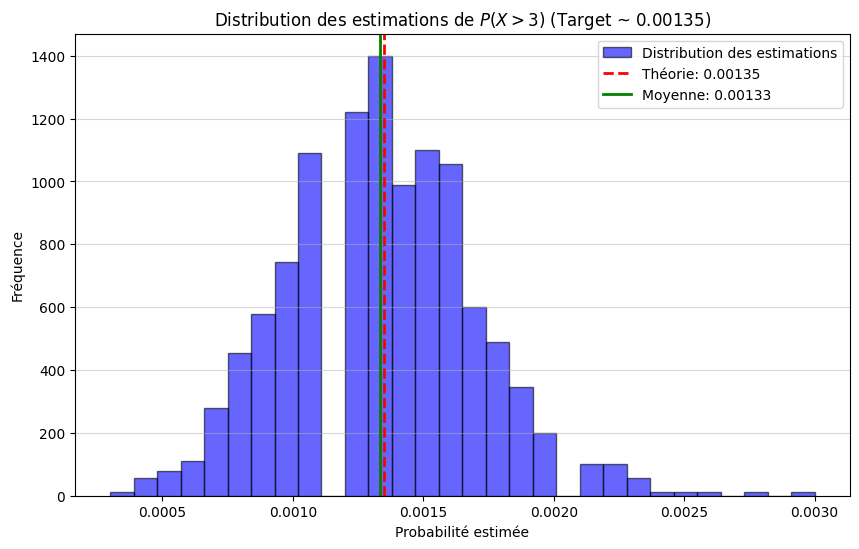

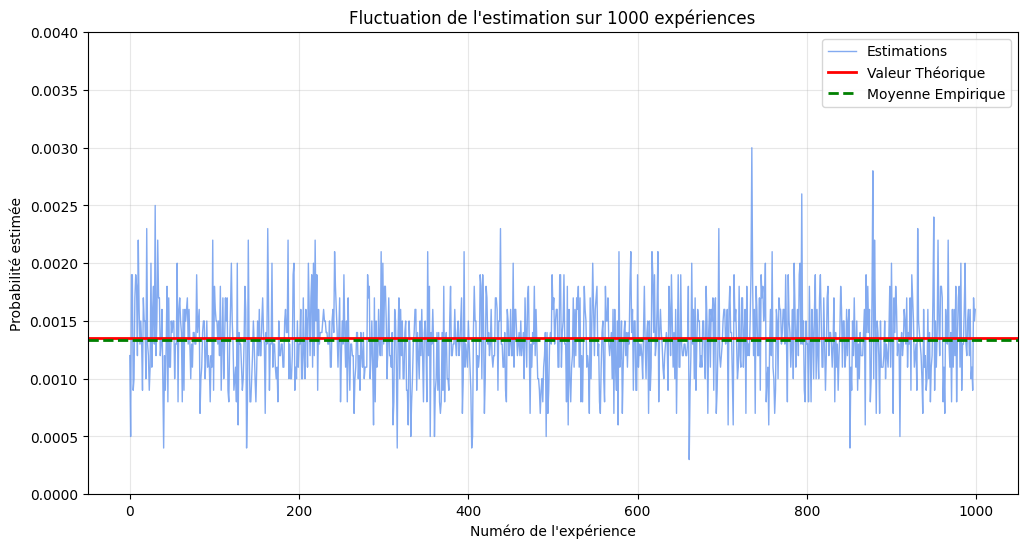

Variance de l'estimateur : 0.000000132


In [ ]:
from scipy.stats import norm

#Paramètre 
Ns = 10000
Nb_sim = 1000
valeur_theorique = 1 - norm.cdf(3)


#Monte Carlo
pmc_estimates = []
for j in range(Nb_sim):
    #Loi Normale 
    X = np.random.randn(Ns)
    somme = 0 
    for i in range(Ns):
        if X[i]>3:
            somme+=1

    pmc = (1/Ns) * somme
    pmc_estimates.append(pmc)


# --- PLOT 1 : Histogramme ---
plt.figure(figsize=(10, 6))

# Histogramme
plt.hist(pmc_estimates, bins=30, density=True, alpha=0.6, color='b', edgecolor='black', label='Distribution des estimations')

# Ligne Rouge : Valeur théorique (et non Pi !)
plt.axvline(x=valeur_theorique, color='r', linestyle='--', linewidth=2, label=f'Théorie: {valeur_theorique:.5f}')

# Ligne Verte : Moyenne obtenue
moyenne_empirique = np.mean(pmc_estimates)
plt.axvline(x=moyenne_empirique, color='g', linestyle='-', linewidth=2, label=f'Moyenne: {moyenne_empirique:.5f}')

plt.title(f"Distribution des estimations de $P(X>3)$ (Target ~ 0.00135)")
plt.xlabel("Probabilité estimée")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

# --- PLOT 2 : Line Plot (Fluctuations) ---
plt.figure(figsize=(12, 6))
plt.plot(pmc_estimates, color='cornflowerblue', linewidth=1, alpha=0.8, label='Estimations')

# Lignes de référence
plt.axhline(y=valeur_theorique, color='red', linestyle='-', linewidth=2, label='Valeur Théorique')
plt.axhline(y=moyenne_empirique, color='green', linestyle='--', linewidth=2, label='Moyenne Empirique')

plt.title(f"Fluctuation de l'estimation sur {Nb_sim} expériences")
plt.xlabel("Numéro de l'expérience")
plt.ylabel("Probabilité estimée")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)


plt.ylim(0, 0.004) 

plt.show()


variance = np.var(pmc_estimates)
print(f"Variance de l'estimateur : {variance:.9f}")



<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Estimateur par Échantillonnage d'Importance (Importance Sampling)

On souhaite estimer $p = \mathbb{P}(X > 3)$ en utilisant une loi instrumentale $Y \sim \mathcal{N}(4,1)$.

On peut réécrire l'intégrale de probabilité en changeant la mesure de référence :
$$
p = \int_{-\infty}^{+\infty} \mathbb{1}_{x>3} f(x) dx = \int_{-\infty}^{+\infty} \mathbb{1}_{y>3} \frac{f(y)}{g(y)} g(y) dy = \mathbb{E}_g \left[ \mathbb{1}_{Y>3} \frac{f(Y)}{g(Y)} \right]
$$
Où $f$ est la densité de $\mathcal{N}(0,1)$ et $g$ la densité de $\mathcal{N}(4,1)$.

**Calcul du Poids d'Importance (Likelihood Ratio)**


Le poids $w(y)$ est défini par le rapport des densités :
$$
w(y) = \frac{f(y)}{g(y)} = \frac{\frac{1}{\sqrt{2\pi}} e^{-y^2/2}}{\frac{1}{\sqrt{2\pi}} e^{-(y-4)^2/2}}
$$
En simplifiant les constantes et en regroupant les exponentielles :
$$
w(y) = \exp\left( -\frac{y^2}{2} + \frac{(y-4)^2}{2} \right)
$$
En développant $(y-4)^2 = y^2 - 8y + 16$ :
$$
w(y) = \exp\left( \frac{-y^2 + y^2 - 8y + 16}{2} \right) = \exp(8 - 4y)
$$

**L'Estimateur Final**


L'estimateur de Monte Carlo par échantillonnage d'importance est donc la moyenne empirique pondérée :

$$
\hat{p}_{IS} = \frac{1}{N} \sum_{i=1}^{N} \mathbb{1}_{Y_i > 3} \cdot e^{8 - 4Y_i}
$$

Où les échantillons $Y_1, \dots, Y_N$ sont tirés selon la loi **$\mathcal{N}(4, 1)$**.

</div>

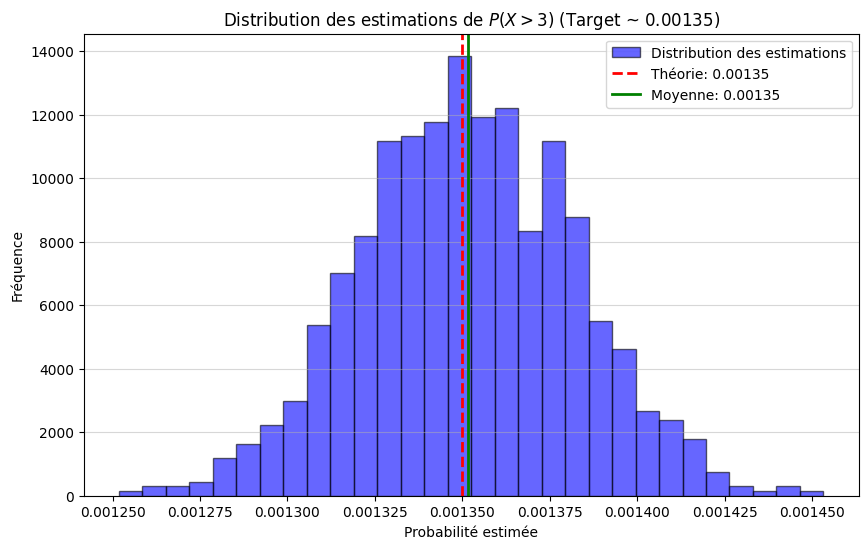

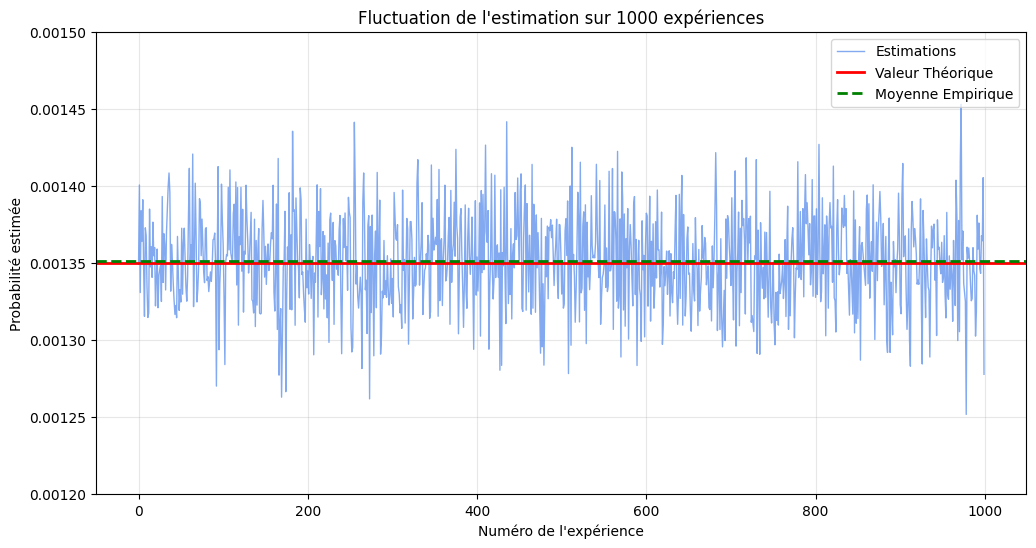

Variance de l'estimateur : 0.000000001


In [27]:
from scipy.stats import norm

#Paramètre 
Ns = 10000
Nb_sim = 1000
valeur_theorique = 1 - norm.cdf(3)


#Monte Carlo
pmc_estimates = []
for j in range(Nb_sim):
    #Loi Normale 
    Y = 4 + 1 * np.random.randn(Ns)
    somme = 0 
    for i in range(Ns):
        if Y[i]>3:
            somme += np.exp(8-4*Y[i])

    pmc = (1/Ns) * somme
    pmc_estimates.append(pmc)


# --- PLOT 1 : Histogramme ---
plt.figure(figsize=(10, 6))

# Histogramme
plt.hist(pmc_estimates, bins=30, density=True, alpha=0.6, color='b', edgecolor='black', label='Distribution des estimations')

# Ligne Rouge : Valeur théorique (et non Pi !)
plt.axvline(x=valeur_theorique, color='r', linestyle='--', linewidth=2, label=f'Théorie: {valeur_theorique:.5f}')

# Ligne Verte : Moyenne obtenue
moyenne_empirique = np.mean(pmc_estimates)
plt.axvline(x=moyenne_empirique, color='g', linestyle='-', linewidth=2, label=f'Moyenne: {moyenne_empirique:.5f}')

plt.title(f"Distribution des estimations de $P(X>3)$ (Target ~ 0.00135)")
plt.xlabel("Probabilité estimée")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

# --- PLOT 2 : Line Plot (Fluctuations) ---
plt.figure(figsize=(12, 6))
plt.plot(pmc_estimates, color='cornflowerblue', linewidth=1, alpha=0.8, label='Estimations')

# Lignes de référence
plt.axhline(y=valeur_theorique, color='red', linestyle='-', linewidth=2, label='Valeur Théorique')
plt.axhline(y=moyenne_empirique, color='green', linestyle='--', linewidth=2, label='Moyenne Empirique')

plt.title(f"Fluctuation de l'estimation sur {Nb_sim} expériences")
plt.xlabel("Numéro de l'expérience")
plt.ylabel("Probabilité estimée")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)


plt.ylim(0.0012, 0.0015) 

plt.show()


variance = np.var(pmc_estimates)
print(f"Variance de l'estimateur : {variance:.9f}")



<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Analyse de la Réduction de Variance

**Quantification de la réduction**
On calcule le rapport entre la variance de l'estimateur Monte Carlo standard ($Var_{MC}$) et celle de l'échantillonnage d'importance ($Var_{IS}$) :

$$\text{Gain} = \frac{Var_{MC}}{Var_{IS}} = \frac{1.32 \times 10^{-7}}{1.0 \times 10^{-9}} \approx 132$$

**Commentaire et Interprétation**
La méthode de l'échantillonnage d'importance a permis de **diviser la variance par un facteur d'environ 132**.

Cela a deux conséquences majeures :

* **Précision accrue :** L'écart-type (qui détermine la largeur de l'intervalle de confiance) est réduit d'un facteur $\sqrt{132} \approx 11.5$. L'estimation est donc beaucoup plus fiable.
* **Gain de temps de calcul (Efficacité) :** Comme la variance d'un estimateur de Monte Carlo décroît en $1/N$, cela signifie que pour obtenir la **même précision** avec la méthode Monte Carlo standard (naïve), il aurait fallu utiliser **132 fois plus d'échantillons**.
    * Au lieu de $10\,000$ points, il aurait fallu en simuler $1\,320\,000$.
    * L'Importance Sampling est donc ici numériquement beaucoup plus efficace pour traiter cet événement rare.

</div>